# Exploring the Microbiome - MED-263 Final
## Lucas Patel & Yotam Voskoboynik

### Table of Contents

* [Introduction ](#introduction)
    * [What is the microbiome?](#what-is-the-microbiome)
    * [Data retrieval](#data-retrieval)
* [Exploration](#exploration)
    * [Abundance](#abundance)
    * [Prevalence](#prevalence)
* [Conclusion](#conclusion)
        
---

## Introduction <a name="introduction"></a>

### What is the microbiome? <a name="what-is-the-microbiome"></a>

The microbiome refers to the complex environments in which microorganisms thrive under various conditions. The study of the microbiome looks at the differences between communities and assesses concepts such as the relative proportions of different taxa, their impacts on each other, and their changes over time. Microbiomes can be derived from the environment, such as oceans or the atmosphere, from food and waste, or even from inside the bodies of other larger organisms. The software described below facilitates the analysis of microbial communities and the following guide is an overview of these software functionalities.

### Data retrieval <a name="section_1_2"></a>

First, install the microbiome `mia` package (and `miaViz`) if not already done:

In [16]:
if(!require("miaViz")){  
    BiocManager::install("miaViz")
}
if(!require("mia")){  
    BiocManager::install("mia")
}
if(!require("microbiomeDataSets")){
    BiocManager::install("microbiomeDataSets")
}

library("mia")
library("miaViz")

Loading required package: microbiomeDataSets

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘microbiomeDataSets’”
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'microbiomeDataSets'

also installing the dependencies ‘sass’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘crosstalk’, ‘shiny’, ‘DT’, ‘interactiveDisplayBase’, ‘AnnotationHub’, ‘ExperimentHub’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'clipr', 'desc', 'evaluate', 'GenomicFeatures', 'limma',
  'locfit', 'maptools', 'mgcv', 'openssl', 'rmarkdown', 'survival', 'tinytex',
  'xfun', 'XML', 'yaml'



The `mia` package features a variety of functions to import microbiome data from numerous input file formats including CSV and QIIME2. However, for simplicity we will load the built in microbiome data as follows:

In [1]:
data(GlobalPatterns, package="mia") 
gp_mia <- GlobalPatterns
gp_mia

Loading required package: TreeSummarizedExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, ro

class: TreeSummarizedExperiment 
dim: 19216 26 
metadata(0):
assays(1): counts
rownames(19216): 549322 522457 ... 200359 271582
rowData names(7): Kingdom Phylum ... Genus Species
colnames(26): CL3 CC1 ... Even2 Even3
colData names(7): X.SampleID Primer ... SampleType Description
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
rowLinks: a LinkDataFrame (19216 rows)
rowTree: 1 phylo tree(s) (19216 leaves)
colLinks: NULL
colTree: NULL

As you can see, the above data set is a `TreeSummarizedExperiment`. A `TreeSummarizedExperiment` is an extension of the `SummarizedExperiment` class in R, which is a convenient way of storing tabular data that is common in genomics. The `TreeSummarizedExperiment` adds further improvements for hierarchical data which is very relevant in the analysis of the microbiome where hierarchical phylogenetic trees are common.

![TSE](https://raw.githubusercontent.com/fionarhuang/TreeSummarizedExperiment/master/vignettes/tse.png)

We can explore a bit of the data as follows:

In [7]:
rowData(gp_mia)

DataFrame with 6 rows and 7 columns
           Kingdom        Phylum        Class        Order        Family
       <character>   <character>  <character>  <character>   <character>
549322     Archaea Crenarchaeota Thermoprotei           NA            NA
522457     Archaea Crenarchaeota Thermoprotei           NA            NA
951        Archaea Crenarchaeota Thermoprotei Sulfolobales Sulfolobaceae
244423     Archaea Crenarchaeota        Sd-NA           NA            NA
586076     Archaea Crenarchaeota        Sd-NA           NA            NA
246140     Archaea Crenarchaeota        Sd-NA           NA            NA
             Genus                Species
       <character>            <character>
549322          NA                     NA
522457          NA                     NA
951     Sulfolobus Sulfolobusacidocalda..
244423          NA                     NA
586076          NA                     NA
246140          NA                     NA

As we proceed in this tutorial, we may want to use different datasets for different exploratory purposes. While this demonstration data gives us a good overview on how the data is structured, it lacks human-readable phylogenic information. In order to list all the available datasets we can use another package `microbiomeDataSets` that features microbial datasets from literature already processed and stored in `TreeSummarizedExperiment` objects.

In [20]:
library(microbiomeDataSets)
availableDataSets()

Dataset
<chr>
GrieneisenTSData
HintikkaXOData
LahtiMLData
LahtiMData
LahtiWAData
OKeefeDSData
SilvermanAGutData
SongQAData
SprockettTHData


## Exploration <a name="exploration"></a>

The `mia` package offers several ways to explore microbial data. In this section we'll cover abundance and prevalence.

To do this, we'll use data from the Lahti et al. 2014 paper "Tipping elements in the human intestinal ecosystem" and load this data from the `microbiomeDataSets` package.

### Abundance <a name="abundance"></a>

Relative abundance as a term in ecology refers to "the percent composition of an organism of a particular kind relative to the total number of organisms in the area" where in this case the "area" refers to the intestinal microbiome of western inhabitants.

To visualize this, we will plot the abundances of the entries with the highest relative abundances within this data set.

snapshotDate(): 2021-10-19

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache



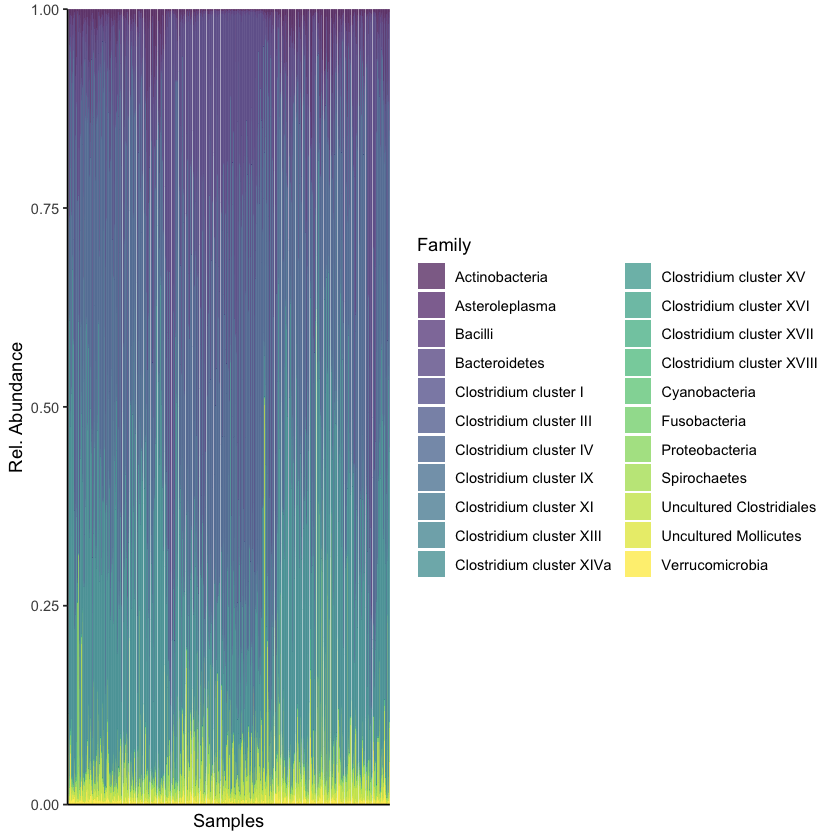

In [108]:
tse <- atlas1006() # refers to LahtiWAData above

# Counts relative abundances
tse <- transformSamples(tse, method = "relabundance")
plotAbundance(tse, abund_values = "relabundance", rank="Family")

We can see relatively high abundances for families like Bacteroidetes and much lower abundances for families like Spirochaetes.  

While pretty, this isn't super useful for delinating granular patterns, so we'll graph abundances again at a finer taxonomical level and use both a jitter plot and a density plot with the first 10 entries for simplicity.

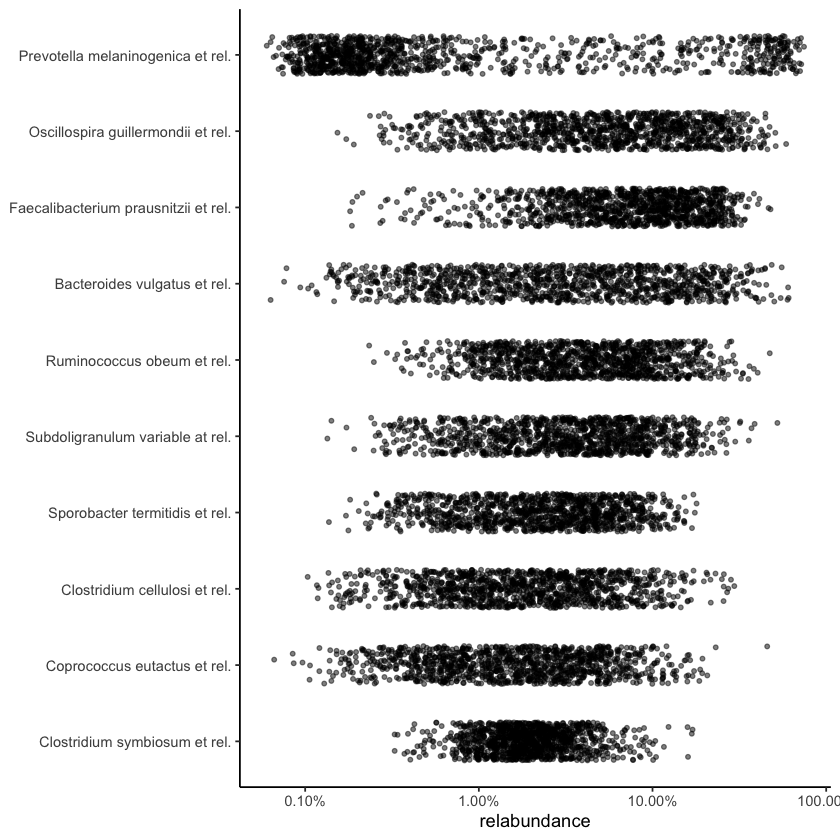

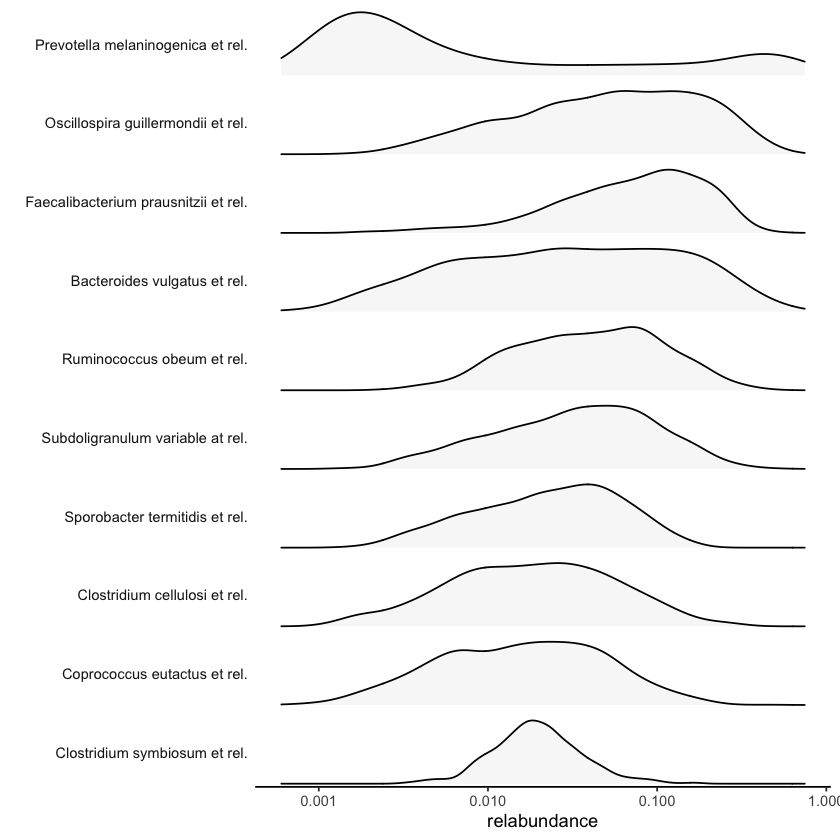

In [115]:
plotAbundanceDensity(tse, layout = "jitter", abund_values = "relabundance",
                     n = 10, point_size=1, point_shape=19, point_alpha=0.5) + 
                     scale_x_log10(label=scales::percent)


plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10,  point_alpha=1/10 ) +
                     scale_x_log10()

While the density plots seem to show rather uninteresting distributions, remember that these `TreeSummarizedExperiment` datasets contain metadata. We can check the metadata for the study participants like so:

In [124]:
names(colData(tse))

[1] "age"                   "sex"                   "nationality"          
 [4] "DNA_extraction_method" "project"               "diversity"            
 [7] "bmi_group"             "subject"               "time"                 
[10] "sample"

Then we can color the density plot using this participant metadata to look for interesting patterns.

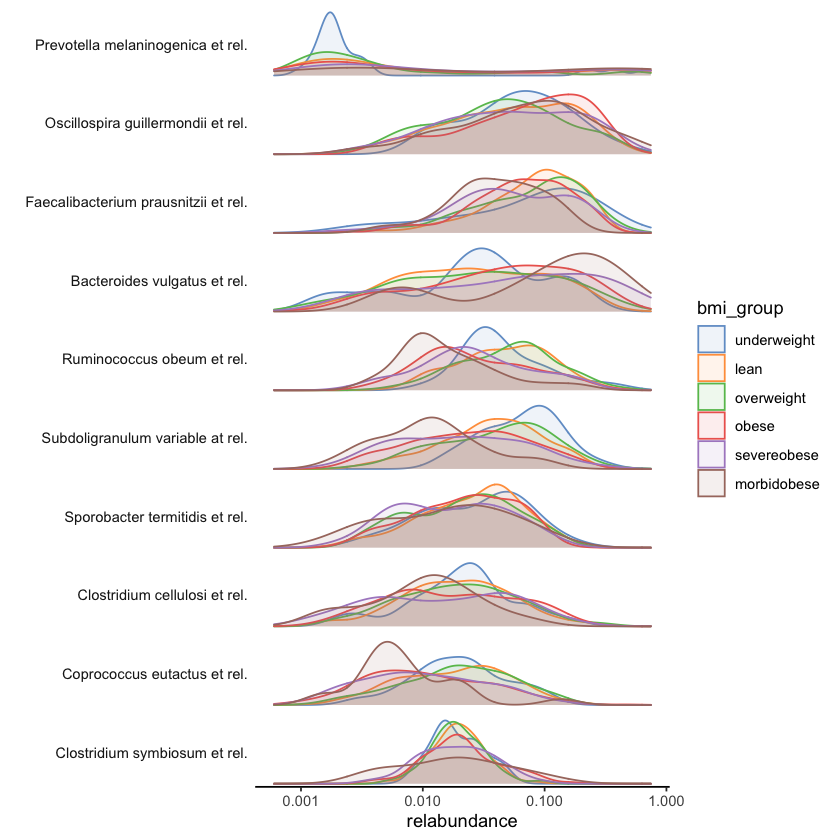

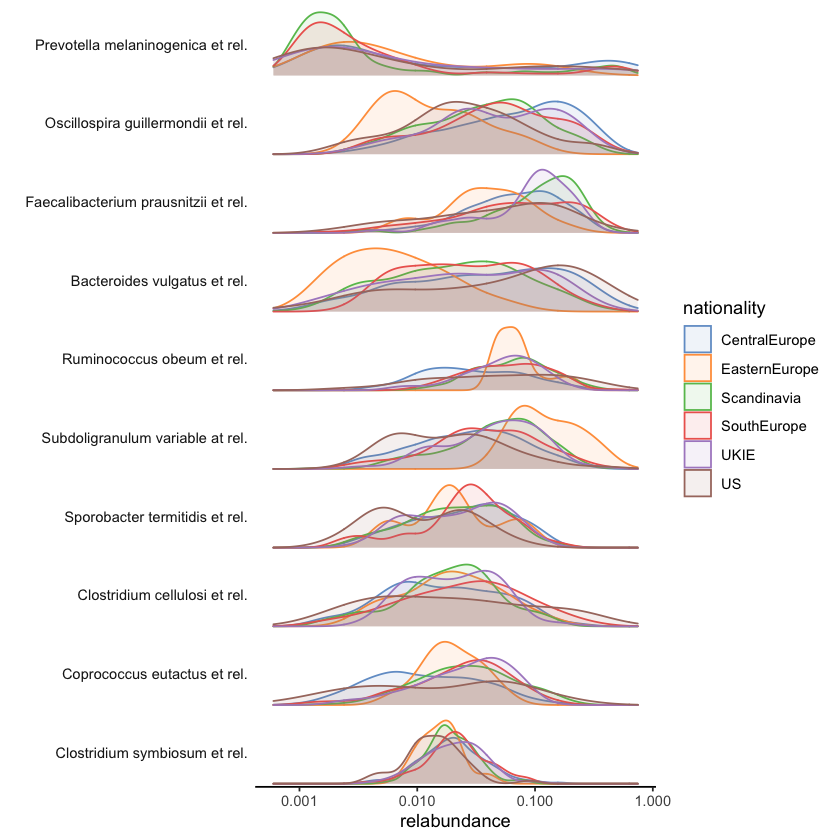

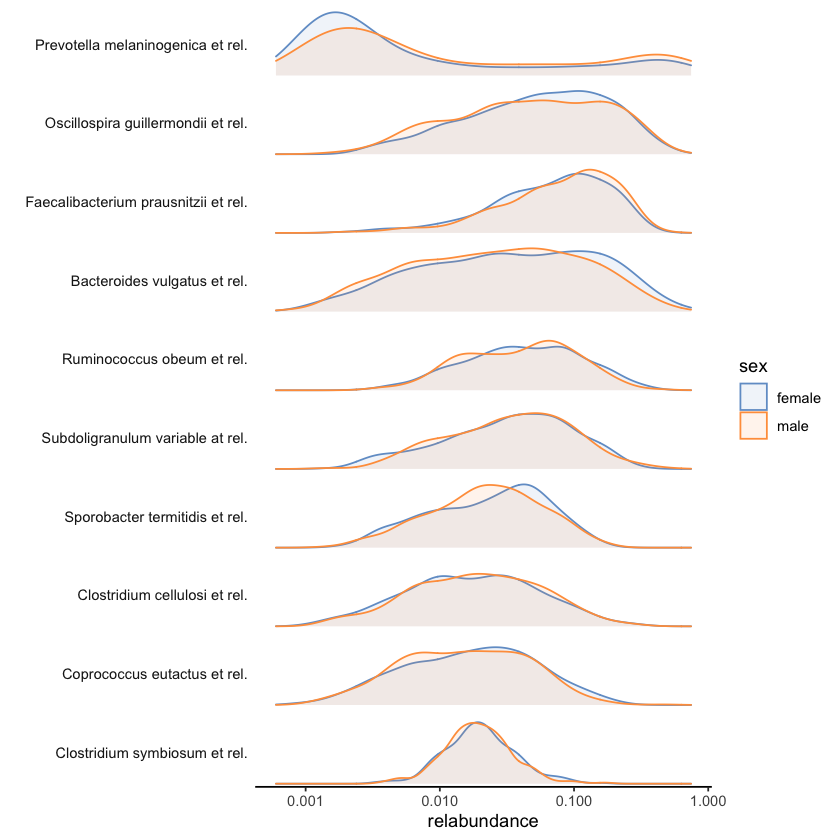

In [126]:
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="bmi_group", point_alpha=1/10 ) +
                     scale_x_log10()
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="nationality", point_alpha=1/10 ) +
                     scale_x_log10()
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="sex", point_alpha=1/10 ) +
                     scale_x_log10()

Much more interesting! As you can see there is variability in the distribution of taxa for different nationalities and for different BMI groups. The uncolored versions of these plots show the cumulative average across all samples, but breaking down abundances in this way can reveal patterns for further study.

### Prevalence <a name="prevalence"></a>



###  _____ <a name="_____"></a>

Using `miaviz`, we can visualize the abundances as well.

In [82]:
head(getPrevalence(tse, detection = 1/100, sort = TRUE, as_relative = TRUE))

Faecalibacterium prausnitzii et rel.           Ruminococcus obeum et rel. 
                           0.9522155                            0.9139878 
  Oscillospira guillermondii et rel.        Clostridium symbiosum et rel. 
                           0.8801043                            0.8714162 
    Subdoligranulum variable at rel.     Clostridium orbiscindens et rel. 
                           0.8357950                            0.8314509

In [83]:
head(getPrevalence(tse, detection = 1, sort = TRUE, abund_values = "counts",
                   as_relative = FALSE))

Uncultured Mollicutes      Uncultured Clostridiales II 
                               1                                1 
      Uncultured Clostridiales I               Tannerella et rel. 
                               1                                1 
  Sutterella wadsworthia et rel. Subdoligranulum variable at rel. 
                               1                                1

Firmicutes   Bacteroidetes  Actinobacteria  Proteobacteria Verrucomicrobia 
   1.0000000000    0.9852302346    0.4821894005    0.2988705474    0.1277150304 
  Cyanobacteria 
   0.0008688097

Warning message in toTree(td):
“The root is added with label 'ALL'”


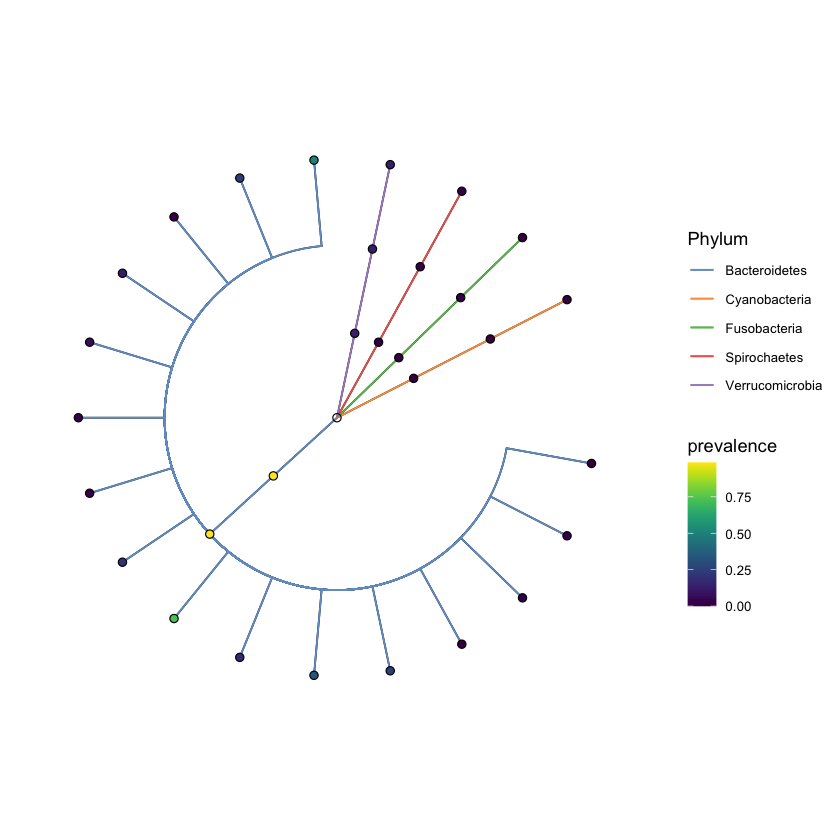

In [95]:
altExp(tse,"Phylum") <- agglomerateByRank(tse, "Phylum")
head(getPrevalence(altExp(tse,"Phylum"), detection = 1/100, sort = TRUE,
                   abund_values = "counts", as_relative = TRUE))
rowData(altExp(tse,"Phylum"))$prevalence <- 
    getPrevalence(altExp(tse,"Phylum"), detection = 1/100, sort = FALSE,
                  abund_values = "counts", as_relative = TRUE)
altExps(tse) <- splitByRanks(tse)
altExps(tse) <-
   lapply(altExps(tse),
          function(y){
              rowData(y)$prevalence <- 
                  getPrevalence(y, detection = 1/100, sort = FALSE,
                                abund_values = "counts", as_relative = TRUE)
              y
          })
top_phyla <- getTopTaxa(altExp(tse,"Phylum"),
                        method="prevalence",
                        top=5L,
                        abund_values="counts")
top_phyla_mean <- getTopTaxa(altExp(tse,"Phylum"),
                             method="mean",
                             top=5L,
                             abund_values="counts")
x <- unsplitByRanks(tse, ranks = taxonomyRanks(tse)[1:6])
x <- addTaxonomyTree(x)

plotRowTree(x[rowData(x)$Phylum %in% top_phyla,],
            edge_colour_by = "Phylum",
            tip_colour_by = "prevalence",
            node_colour_by = "prevalence")

## Conclusion <a name="conclusion"></a>